***Maciej Górnik 402325 gr czwartek 11:00***

# Data Analytics -  Lab 1 - Random data visualisation and sampling

1. Create a ```jupyter``` notebook.
2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
```math
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
```

```math
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
```
3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).
4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).
5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
```math
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
``` 

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).  


#Imports

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
from scipy.stats import halfnorm, norm

#Task 2

In [240]:
arr1 = np.random.uniform(size= 1000)

In [241]:
arr2 = np.random.normal(0,1,1000)

In [242]:
arr3 = np.random.normal(0,10,1000)

In [243]:
arr4 = np.random.beta(1,1, 1000)

In [244]:
arr5 = np.random.beta(2,2, 1000)

In [245]:
arr6 = np.random.beta(3,9, 1000)

In [246]:
arr7 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000)

In [247]:
arr8 = np.random.multivariate_normal([0,0], [[2,1],[1,2]], 10000)

#Task 3

In [248]:
n_bins=25

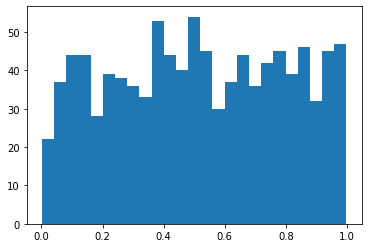

In [249]:
hist1, bins1, p = plt.hist(arr1, bins=n_bins)
plt.show()

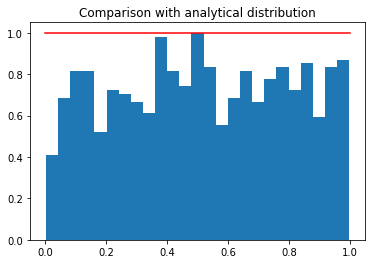

In [250]:
hist1_norm = hist1 / float(max(hist1))
width = bins1[1] - bins1[0]
x = bins1[:-1] + width/2
plt.bar(x, hist1_norm, width=width)

x = np.linspace(0, 1, 50)

plt.plot(x, [1] * 50, 'r')
plt.title("Comparison with analytical distribution")
plt.show()

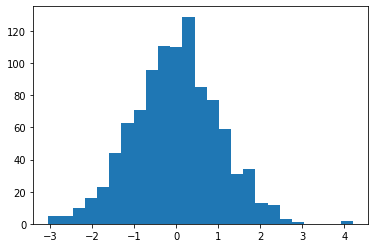

In [251]:
hist2, bins2, p = plt.hist(arr2, bins=n_bins)
plt.show()


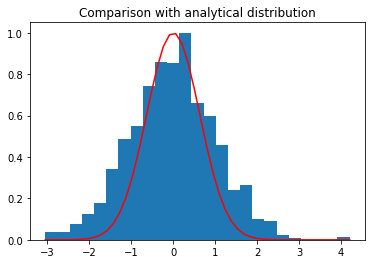

In [252]:
hist2_norm = hist2 / float(max(hist2))
width = bins2[1] - bins2[0]
x = bins2[:-1] + width/2
plt.bar(x, hist2_norm, width=width)

mean = 0
std_dev = 1

x = np.linspace(bins2[0], bins2[-1], 50)
y = np.exp((-1 / 2 * ((x-mean)/std_dev)**2) / 1 * np.sqrt(2 * np.pi))
plt.plot(x, y, 'r')
plt.title("Comparison with analytical distribution")
plt.show()

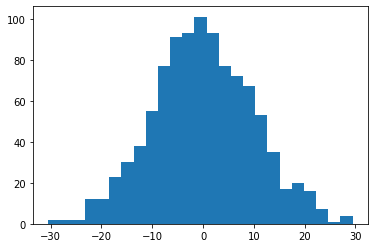

In [253]:
hist3, bins3, p = plt.hist(arr3, bins=n_bins)
plt.show()

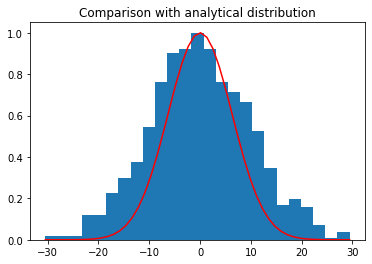

In [254]:
hist3_norm = hist3 / float(max(hist3))
width = bins3[1] - bins3[0]
x = bins3[:-1] + width/2
plt.bar(x, hist3_norm, width=width)

mean = 0
std_dev = 10

x = np.linspace(bins3[0], bins3[-1], 50)
y = np.exp((-1 / 2 * ((x-mean)/std_dev)**2) / 1 * np.sqrt(2 * np.pi))
plt.plot(x, y, 'r')
plt.title("Comparison with analytical distribution")
plt.show()

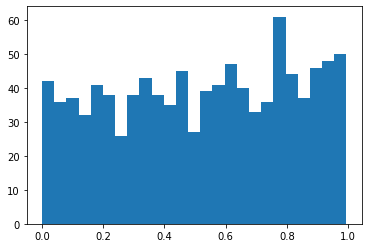

In [255]:
plt.hist(arr4, bins=n_bins)
plt.show()

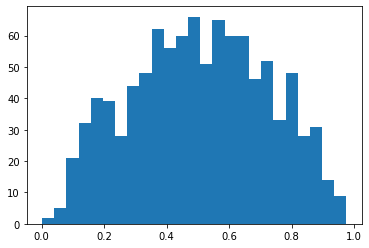

In [256]:
plt.hist(arr5, bins=n_bins)
plt.show()

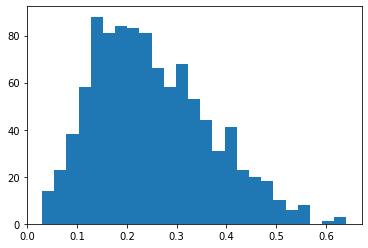

In [257]:
plt.hist(arr6, bins=n_bins)
plt.show()

# Task 4

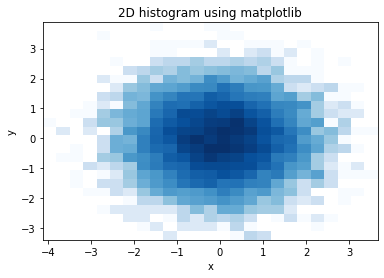

In [258]:
plt.hist2d(arr7[:, 0],
           arr7[:, 1],
           bins = 25, 
           cmap = "Blues",
           norm = colors.LogNorm())
plt.title("2D histogram using matplotlib")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

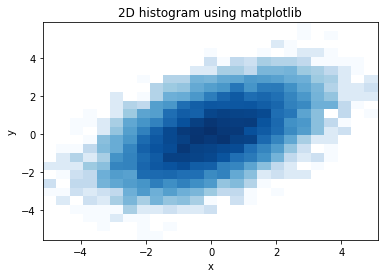

In [259]:
plt.hist2d(arr8[:, 0],
           arr8[:, 1],
           bins = 25, 
           cmap = "Blues",
           norm = colors.LogNorm())
plt.title("2D histogram using matplotlib")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

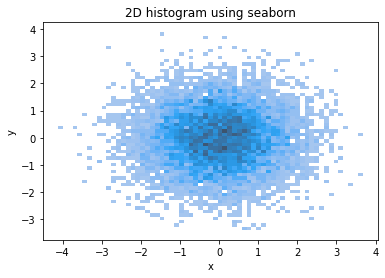

In [260]:
sb.histplot(arr7,x=arr7[:,0],y=arr7[:,1])
plt.title("2D histogram using seaborn")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

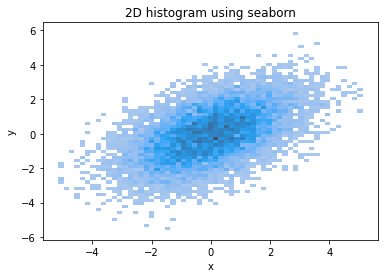

In [261]:
sb.histplot(arr8,x=arr8[:,0],y=arr8[:,1])
plt.title("2D histogram using seaborn")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Task 5

In [262]:
alpha = np.random.normal(2,0.1,1000)
beta = np.random.normal(0.2,0.2,1000)
x = np.random.normal(0,3,1000)
sigma = abs(np.random.normal(0,1,1000))
mi = alpha + beta*x

y = np.random.normal(mi,sigma,1000)

#Task 6

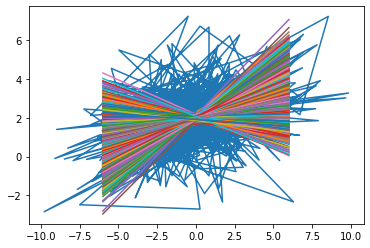

In [263]:
x1 = np.array([-6,6])
plt.plot(x,y)
for a,b in zip(alpha,beta):
  y1 = a + b*x1
  plt.plot(x1,y1)